In [1]:
from __future__ import print_function
import os
data_path = ['./Intel_ML501_Dataset/']

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

#### 1. drop columns

In [2]:
import pandas as pd

# Import the data using the file path
filepath = os.sep.join(data_path + ['Orange_Telecom_Churn_Data.csv'])
data = pd.read_csv(filepath)

In [3]:
data.head(1).T

,0
state,KS
account_length,128
area_code,415
phone_number,382-4657
intl_plan,no
voice_mail_plan,yes
number_vmail_messages,25
total_day_minutes,265.1
total_day_calls,110
total_day_charge,45.07


In [4]:
# Remove extraneous columns
data.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)

In [5]:
data.columns

Index(['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

#### 2. categorical data to numerical data

In [6]:
lb = LabelBinarizer()

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    data[col] = lb.fit_transform(data[col])

### Apply MinMaxScaler and StandardScaler

In [7]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

# MinMaxScaler
mmsc = MinMaxScaler() # data scale to 0~1
data_mmsc = pd.DataFrame(mmsc.fit_transform(data), columns=data.columns)

# StandardScaler
stdsc = StandardScaler() # data to mean=0 std=1
# standardize data except label column, to avoid label value becoming non integer boolean value
data_stdsc = pd.DataFrame(stdsc.fit_transform(data.drop(['churned'], axis=1, inplace=False)), columns=data.columns.drop(['churned']))
# add label column from original data to standard scaled data
data_stdsc['churned'] = data['churned']

In [8]:
data_mmsc

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111,0.0
1,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111,0.0
2,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000,0.0
3,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222,0.0
4,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.202479,0.0,1.0,0.769231,0.670555,0.769697,0.670515,0.613143,0.741176,0.613394,0.753165,0.662857,0.753517,0.495,0.25,0.494444,0.222222,0.0
4996,0.623967,0.0,0.0,0.000000,0.524040,0.545455,0.523929,0.706076,0.429412,0.706244,0.540759,0.645714,0.540799,0.735,0.10,0.735185,0.333333,1.0
4997,0.247934,0.0,0.0,0.000000,0.400000,0.539394,0.399933,0.475117,0.752941,0.475251,0.537722,0.554286,0.537985,0.680,0.20,0.679630,0.111111,0.0
4998,0.446281,0.0,0.0,0.000000,0.537127,0.406061,0.537149,0.472092,0.541176,0.472016,0.568101,0.508571,0.568374,0.425,0.30,0.425926,0.000000,0.0


In [9]:
data_stdsc

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0.698941,-0.323240,1.667120,1.273145,1.573802,0.502824,1.574074,-0.064032,-0.060077,-0.063849,0.876999,-0.446928,0.876286,-0.094809,-0.584236,-0.095509,-0.436676,0
1,0.169849,-0.323240,1.667120,1.346973,-0.346802,1.158422,-0.347082,-0.101621,0.141693,-0.101089,1.068992,0.154374,1.069818,1.245227,-0.584236,1.245982,-0.436676,0
2,0.925695,-0.323240,-0.599837,-0.572549,1.171125,0.704546,1.171286,-1.571562,0.494791,-1.572084,-0.748012,0.204483,-0.746737,0.701969,0.229917,0.695971,-1.202236,0
3,-0.409634,3.093675,-0.599837,-0.572549,2.210292,-1.463971,2.210457,-2.744745,-0.614946,-2.745155,-0.069110,-0.547145,-0.069377,-1.326194,1.044069,-1.329681,0.328885,0
4,-0.636388,3.093675,-0.599837,-0.572549,-0.252163,0.654116,-0.252115,-1.035419,1.100103,-1.034426,-0.267041,1.056327,-0.267307,-0.058592,-0.584236,-0.055264,1.094445,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.266260,-0.323240,1.667120,2.380562,1.028239,1.360145,1.028291,0.442435,1.301873,0.443551,1.922073,0.805785,1.923114,-0.131027,0.229917,-0.135754,0.328885,0
4996,1.303619,-0.323240,-0.599837,-0.572549,0.072577,-0.505789,0.072080,1.111130,-1.371585,1.111550,0.261434,0.655459,0.260505,1.607399,-0.991312,1.608185,1.094445,1
4997,-0.989116,-0.323240,-0.599837,-0.572549,-0.736489,-0.556220,-0.736771,-0.550715,1.402758,-0.550301,0.237683,-0.146277,0.238513,1.209010,-0.177160,1.205738,-0.436676,0
4998,0.220239,-0.323240,-0.599837,-0.572549,0.157937,-1.665694,0.158313,-0.572477,-0.413175,-0.573577,0.475200,-0.547145,0.476029,-0.638067,0.636993,-0.632105,-1.202236,0


#### 3. separate columns from label

In [10]:
# Get a list of all the columns that don't contain the label
x_cols_mmsc = [x for x in data_mmsc.columns if x != 'churned']

# Split the data into two dataframes
X_data_mmsc = data_mmsc[x_cols_mmsc]
y_data_mmsc = data_mmsc['churned']

# Get a list of all the columns that don't contain the label
x_cols_stdsc = [x for x in data_stdsc.columns if x != 'churned']

# Split the data into two dataframes
X_data_stdsc = data_stdsc[x_cols_stdsc]
y_data_stdsc = data_stdsc['churned']

#### 4. accuracy function

In [11]:
# Function to calculate the % of values that were correctly predicted
def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

#### 6. 

In [12]:
# Fit the K-nearest neighbors model with different values of k
# Store the accuracy measurement for each k
# Different scaler, distance

score_list_euc_mmsc = list()
score_list_man_mmsc = list()
score_list_euc_stdsc = list()
score_list_man_stdsc = list()

for k in range(1, 21):
    
    # Euclidean distance, MinMaxScaler
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, p=2)
    knn_euclidean = knn_euclidean.fit(X_data_mmsc, y_data_mmsc)
    
    y_pred_mmsc = knn_euclidean.predict(X_data_mmsc)
    score_euc_mmsc = accuracy(y_data_mmsc, y_pred_mmsc)
    
    score_list_euc_mmsc.append((k, score_euc_mmsc))
    
    # Manhattan distance, MinMaxScaler
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, p=1)
    knn_manhattan = knn_manhattan.fit(X_data_mmsc, y_data_mmsc)
    
    y_pred_mmsc = knn_manhattan.predict(X_data_mmsc)
    score_man_mmsc = accuracy(y_data_mmsc, y_pred_mmsc)
    
    score_list_man_mmsc.append((k, score_man_mmsc))
    
    # Euclidean distance, StandardScaler
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, p=2)
    knn_euclidean = knn_euclidean.fit(X_data_stdsc, y_data_stdsc)
    
    y_pred_stdsc = knn_euclidean.predict(X_data_stdsc)
    score_euc_stdsc = accuracy(y_data_stdsc, y_pred_stdsc)
    
    score_list_euc_stdsc.append((k, score_euc_stdsc))
    
    # Manhattan distance, StandardScaler
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, p=1)
    knn_manhattan = knn_manhattan.fit(X_data_stdsc, y_data_stdsc)
    
    y_pred_stdsc = knn_manhattan.predict(X_data_stdsc)
    score_man_stdsc = accuracy(y_data_stdsc, y_pred_stdsc)
    
    score_list_man_stdsc.append((k, score_man_stdsc))
    

score_df_euc_mmsc = pd.DataFrame(score_list_euc_mmsc, columns=['k', 'accuracy'])
score_df_man_mmsc = pd.DataFrame(score_list_man_mmsc, columns=['k', 'accuracy'])
score_df_euc_stdsc = pd.DataFrame(score_list_euc_stdsc, columns=['k', 'accuracy'])
score_df_man_stdsc = pd.DataFrame(score_list_man_stdsc, columns=['k', 'accuracy'])

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# set context to notebook to avoid texts overlapping
sns.set_context('notebook')
sns.set_style('ticks')
sns.set_palette('dark')

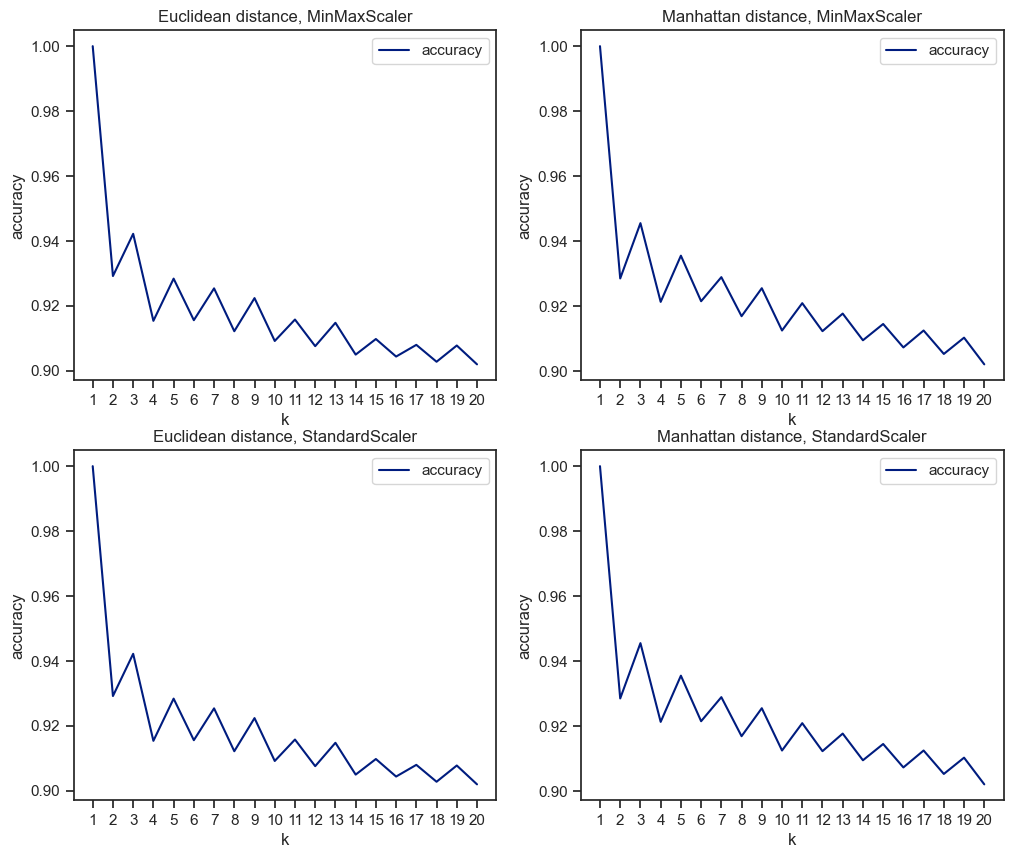

In [19]:
# make 2*2 subplots

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

# plot with seaborn at subplot (0,0)
ax_euc_mmsc = score_df_euc_mmsc.set_index('k').plot(ax=axes[0,0])
ax_euc_mmsc.set_title('Euclidean distance, MinMaxScaler')
ax_euc_mmsc.set(xlabel='k', ylabel='accuracy')
ax_euc_mmsc.set_xticks(range(1, 21));

# plot with seaborn at subplot (0,1)
ax_man_mmsc = score_df_man_mmsc.set_index('k').plot(ax=axes[0,1])
ax_man_mmsc.set_title('Manhattan distance, MinMaxScaler')
ax_man_mmsc.set(xlabel='k', ylabel='accuracy')
ax_man_mmsc.set_xticks(range(1, 21));

# plot with seaborn at subplot (1,0)
ax_euc_stdsc = score_df_euc_mmsc.set_index('k').plot(ax=axes[1,0])
ax_euc_stdsc.set_title('Euclidean distance, StandardScaler')
ax_euc_stdsc.set(xlabel='k', ylabel='accuracy')
ax_euc_stdsc.set_xticks(range(1, 21))

# plot with seaborn at subplot (1,1)
ax_man_stdsc = score_df_man_mmsc.set_index('k').plot(ax=axes[1,1])
ax_man_stdsc.set_title('Manhattan distance, StandardScaler')
ax_man_stdsc.set(xlabel='k', ylabel='accuracy')
ax_man_stdsc.set_xticks(range(1, 21));

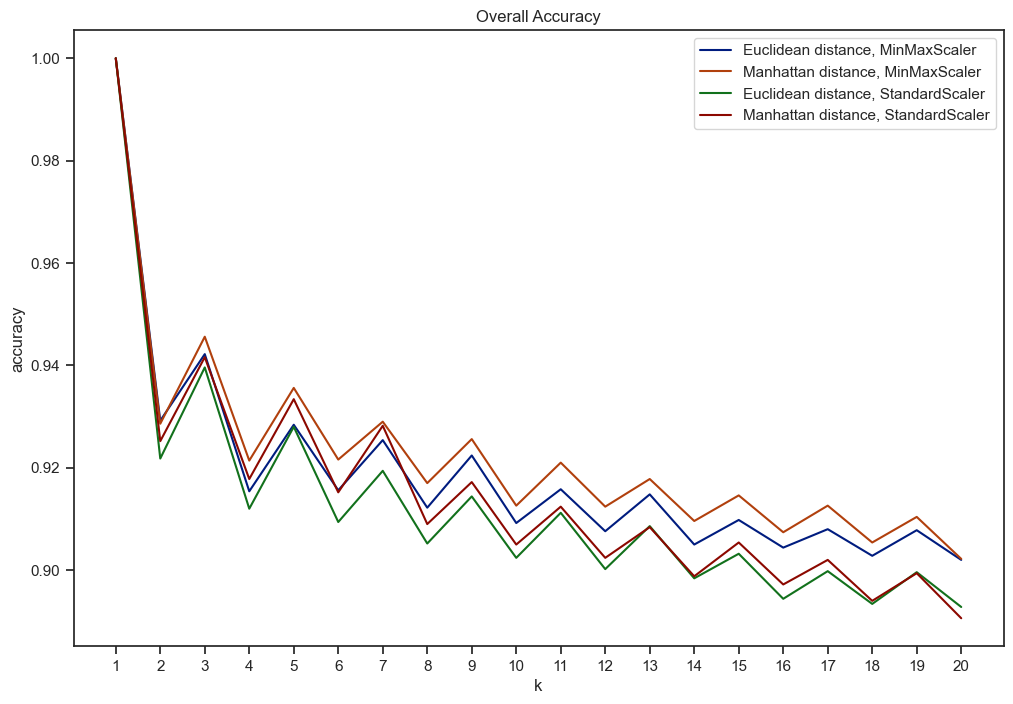

In [23]:
# plot 4 accuracies in one figure for comparison and analysis

fig, axes = plt.subplots(1, figsize=(12,8))
score_df_euc_mmsc.set_index('k').rename(columns={'accuracy':'Euclidean distance, MinMaxScaler'}, inplace=False).plot(ax=axes)
score_df_man_mmsc.set_index('k').rename(columns={'accuracy':'Manhattan distance, MinMaxScaler'}, inplace=False).plot(ax=axes)
score_df_euc_stdsc.set_index('k').rename(columns={'accuracy':'Euclidean distance, StandardScaler'}, inplace=False).plot(ax=axes)
score_df_man_stdsc.set_index('k').rename(columns={'accuracy':'Manhattan distance, StandardScaler'}, inplace=False).plot(ax=axes)
axes.set(xlabel='k', ylabel='accuracy')
axes.set_title('Overall Accuracy')
axes.set_xticks(range(1, 21));